# Import Library

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Load and Preprocessing Data

## Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tweet_sentiment_analysis/training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.shape

(1600000, 6)

In [ ]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Check missing values

In [ ]:
missing_data = df.isna().sum().sort_values(ascending=False)

percentage_missing = round((df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)*100,2)

missing_info = pd.concat([missing_data,percentage_missing],keys=['Missing values','Percentage'],axis=1)

missing_info.style.background_gradient()

,Missing values,Percentage
sentiment,0,0.000000
id,0,0.000000
date,0,0.000000
query,0,0.000000
user_id,0,0.000000
text,0,0.000000


In [ ]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)
df

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
dict_to_sentiment = {0:"Negative", 4:"Positive"}

def label_decoder(label):
  return dict_to_sentiment[label]

df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.sentiment.value_counts()

Negative    800000
Positive    800000
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Sentiment Data Distribution')

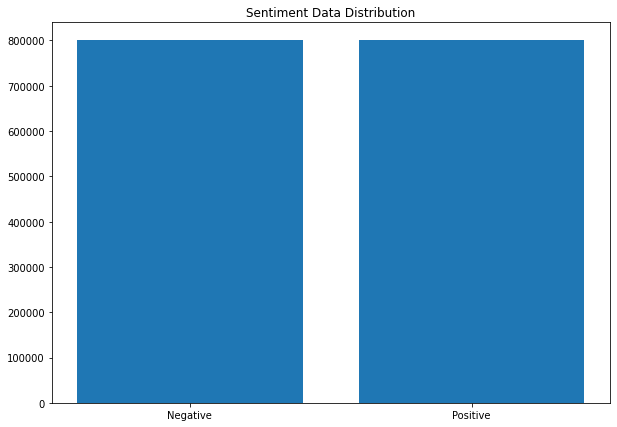

In [ ]:
# Plot bar chart => not skew

value_count = df.sentiment.value_counts()

plt.figure(figsize=(10,7))
plt.bar(value_count.index, value_count.values)
plt.title("Sentiment Data Distribution")

# Text Preprocessing
1. Stemming/ Lematization
2. Remove Stopwords
3. Remove Hyperlinks and Mentions


In [ ]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
df.text = df.text.apply(lambda x: preprocess(x))

In [ ]:
df

,sentiment,text
0,Negative,awww bummer shoulda got david carr third day
1,Negative,upset update facebook texting might cry result...
2,Negative,dived many times ball managed save 50 rest go ...
3,Negative,whole body feels itchy like fire
4,Negative,behaving mad see
...,...,...
1599995,Positive,woke school best feeling ever
1599996,Positive,thewdb com cool hear old walt interviews
1599997,Positive,ready mojo makeover ask details
1599998,Positive,happy 38th birthday boo alll time tupac amaru ...


# Visualize Data with WordCloud

## Positive

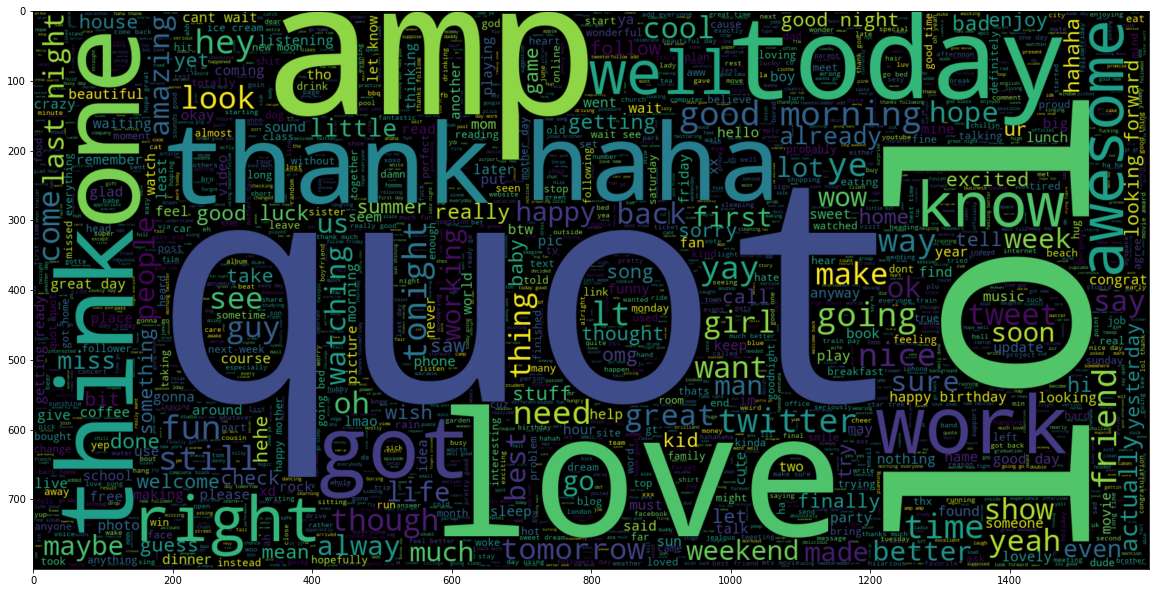

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

## Negative

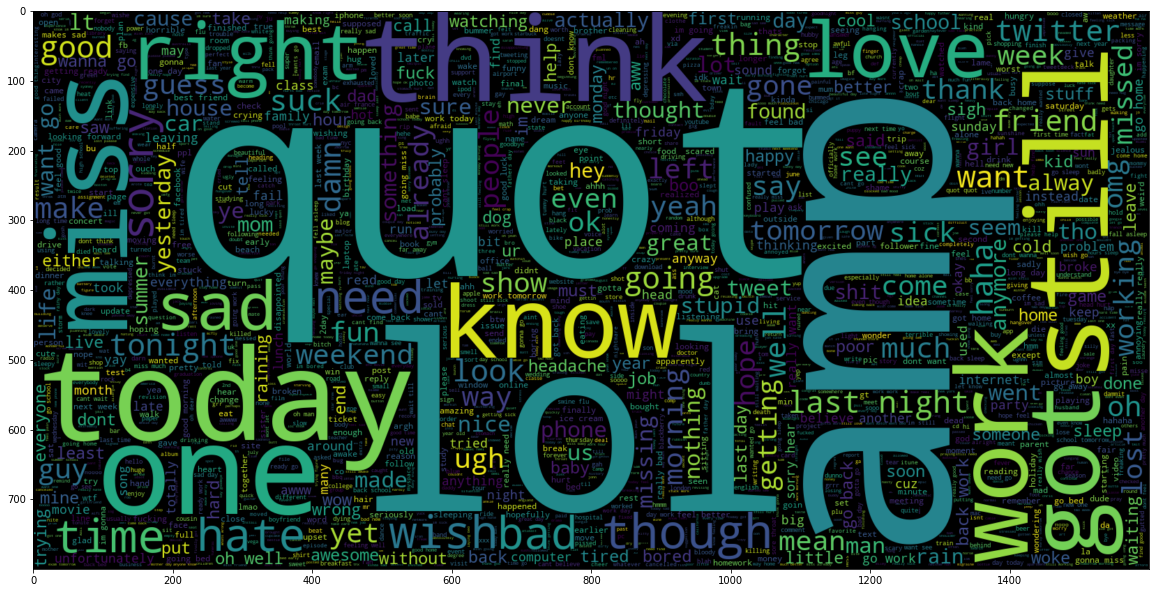

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

# Data Preparing

## Train and Test split

In [ ]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
 
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [ ]:
train_data.head()

,sentiment,text
1374558,Positive,ya quot like palm pre touchstone charger ready...
1389115,Positive,felt earthquake afternoon seems epicenter
1137831,Positive,ruffles shirts like likey
790714,Negative,pretty bad night crappy morning fml buttface d...
1117911,Positive,yeah clear view


## Tokenization

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 290419


In [ ]:
word_index

{'good': 1,
 'day': 2,
 'get': 3,
 'like': 4,
 'go': 5,
 'quot': 6,
 'today': 7,
 'work': 8,
 'going': 9,
 'love': 10,
 'got': 11,
 'lol': 12,
 'time': 13,
 'back': 14,
 'u': 15,
 'one': 16,
 'know': 17,
 'im': 18,
 'really': 19,
 'amp': 20,
 'see': 21,
 'night': 22,
 'still': 23,
 '2': 24,
 'well': 25,
 'new': 26,
 'want': 27,
 'think': 28,
 'home': 29,
 'thanks': 30,
 'oh': 31,
 'much': 32,
 'miss': 33,
 'need': 34,
 'last': 35,
 'morning': 36,
 'tomorrow': 37,
 'hope': 38,
 'great': 39,
 'twitter': 40,
 '3': 41,
 'haha': 42,
 'feel': 43,
 'sad': 44,
 'fun': 45,
 'wish': 46,
 'sleep': 47,
 'right': 48,
 'would': 49,
 'bad': 50,
 'happy': 51,
 'sorry': 52,
 'tonight': 53,
 'come': 54,
 'make': 55,
 'getting': 56,
 'way': 57,
 'though': 58,
 'gonna': 59,
 'nice': 60,
 'better': 61,
 'watching': 62,
 'yeah': 63,
 'bed': 64,
 'wait': 65,
 'could': 66,
 'week': 67,
 'school': 68,
 'people': 69,
 'hate': 70,
 'hey': 71,
 'days': 72,
 'even': 73,
 '4': 74,
 'yes': 75,
 'next': 76,
 'weekend

In [ ]:
from keras.preprocessing.sequence import pad_sequences

max_length = 50

sequences_train = tokenizer.texts_to_sequences(train_data.text) 
sequences_test = tokenizer.texts_to_sequences(test_data.text) 

X_train = pad_sequences(sequences_train, maxlen=max_length, padding='post')
X_test = pad_sequences(sequences_test, maxlen=max_length, padding='post')

y_train = train_data.sentiment.values
y_test = test_data.sentiment.values

In [ ]:
print(X_train[0])
print(y_train[0])

[  164     6     4  2254  1146 42407  2363 71249    75   212     1   712
   118 24590     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0]
Positive


## Label encoder

In [ ]:
labels = train_data.sentiment.unique().tolist()
labels

['Positive', 'Negative']

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


In [ ]:
y_train[0]

array([1])

## Word Embedding

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2022-05-21 02:09:55--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-05-21 02:09:56--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-05-21 02:09:56--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
# GLOVE_EMB = '/content/glove.6B.300d.txt'
GLOVE_EMB = "/content/drive/MyDrive/Colab Notebooks/glove.6B.300d.txt"
EMBEDDING_DIM = 300

In [ ]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
pd.DataFrame(embedding_matrix)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
1,-0.13602,-0.115940,-0.017078,-0.292560,0.016149,0.086472,0.001576,0.343950,0.216610,-2.1366,...,-0.283430,0.064321,-0.41589,-0.070528,0.012410,-0.40208,-0.249630,-0.33760,0.070098,0.246420
2,-0.24501,-0.124910,-0.253600,0.338190,-0.105280,0.172390,-0.241340,0.148480,-0.020182,-1.3848,...,-0.055235,-0.215150,-0.38225,0.158410,0.023086,0.21930,0.055693,-0.41073,-0.619260,0.003901
3,-0.14124,-0.118360,-0.307820,0.098416,0.223920,0.169360,0.148360,-0.030609,0.126750,-1.6780,...,-0.011722,-0.621460,0.14669,-0.178360,0.129010,-0.51668,0.193240,-0.19883,-0.061105,0.115680
4,-0.13443,-0.016333,0.091076,-0.135120,0.278520,0.291780,-0.211260,0.105740,-0.079680,-1.5067,...,0.127560,-0.253880,-0.20297,-0.003984,-0.088324,-0.31850,0.208450,-0.27469,-0.059464,0.494940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290414,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
290415,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
290416,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
290417,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000


In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=max_length,
                                          trainable=False)

# Build Model

## Model 1

### Build Model 1

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

model_1 = Sequential()
model_1.add(embedding_layer)
model_1.add(LSTM(100))
model_1.add(Dense(1, activation='sigmoid'))

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 300)           87125700  
                                                                 
 lstm_2 (LSTM)               (None, 100)               160400    
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 87,286,201
Trainable params: 160,501
Non-trainable params: 87,125,700
_________________________________________________________________


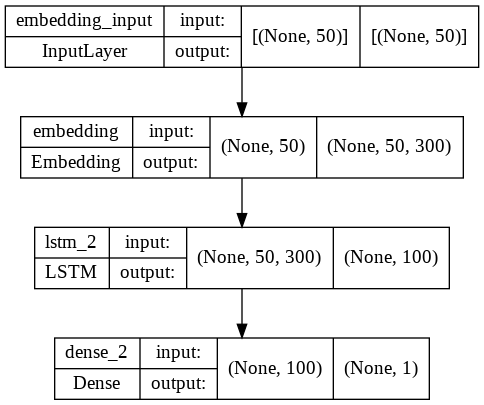

In [ ]:
tf.keras.utils.plot_model(model_1, show_shapes=True)

In [ ]:
model_1.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
%%time
history = model_1.fit(X_train, y_train,
                    batch_size=1024,
                    epochs=10,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/10
1125/1125 [==============================] - 77s 62ms/step - loss: 0.5018 - accuracy: 0.7516 - val_loss: 0.4787 - val_accuracy: 0.7690
Epoch 2/10
1125/1125 [==============================] - 68s 61ms/step - loss: 0.4672 - accuracy: 0.7762 - val_loss: 0.4738 - val_accuracy: 0.7757
Epoch 3/10
1125/1125 [==============================] - 68s 60ms/step - loss: 0.4556 - accuracy: 0.7838 - val_loss: 0.4621 - val_accuracy: 0.7806
Epoch 4/10
1125/1125 [==============================] - 70s 62ms/step - loss: 0.4476 - accuracy: 0.7882 - val_loss: 0.4589 - val_accuracy: 0.7808
Epoch 5/10
1125/1125 [==============================] - 70s 62ms/step - loss: 0.4408 - accuracy: 0.7924 - val_loss: 0.4558 - val_accuracy: 0.7850
Epoch 6/10
1125/1125 [==============================] - 68s 60ms/step - loss: 0.4350 - accuracy: 0.7957 - val_loss: 0.4546 - val_accuracy: 0.7856
Epoch 7/10
1125/1125 [==============================] - 71s 63ms/step - loss: 0.4301 - accuracy: 0.7984 - val_loss: 0.4529 -

In [ ]:
model_1.save("/content/drive/MyDrive/Colab Notebooks/model_1_tweet_sentiment.h5")

### Evalute Model 1

In [ ]:
model_1.evaluate(X_test, y_test, batch_size=1024)

313/313 [==============================] - 10s 24ms/step - loss: 0.4543 - accuracy: 0.7876


[0.454327255487442, 0.7875843644142151]

### Visualize model 1

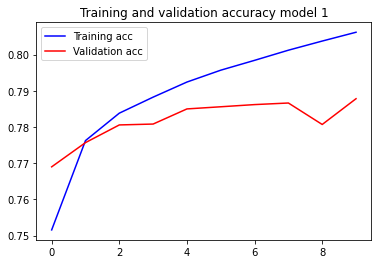

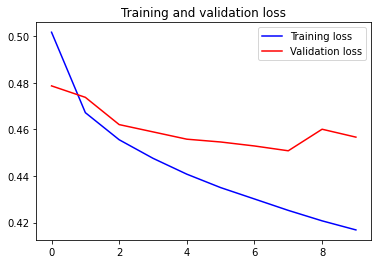

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy model 1')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

### Result Model 1

In [ ]:
# Classification Report
%%time
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"

scores = model_1.predict(X_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 [==============================] - 5s 151ms/step
CPU times: user 5.82 s, sys: 203 ms, total: 6.02 s
Wall time: 6.8 s


In [ ]:
from sklearn.metrics import classification_report
print("Result Model 1")
print(classification_report(list(test_data.sentiment), y_pred_1d))

Result Model 1
              precision    recall  f1-score   support

    Negative       0.79      0.78      0.78    159494
    Positive       0.78      0.80      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



## Model 2

### Build Model 2

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

model_2 = Sequential()
model_2.add(embedding_layer)
model_2.add(Dropout(0.5))
model_2.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_2.add(Dense(1, activation='sigmoid'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 300)           87125700  
                                                                 
 dropout (Dropout)           (None, 50, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 87,286,201
Trainable params: 160,501
Non-trainable params: 87,125,700
_________________________________________________________________


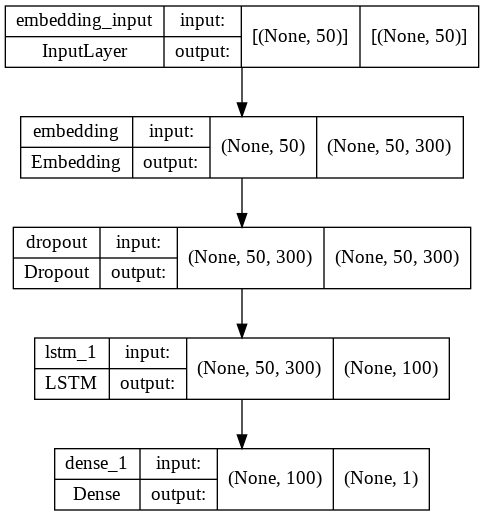

In [ ]:
tf.keras.utils.plot_model(model_2, show_shapes=True)

In [ ]:
model_2.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
%%time
history_2 = model_2.fit(X_train, y_train,
                    batch_size=1024,
                    epochs=10,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/10
1125/1125 [==============================] - 248s 215ms/step - loss: 0.5475 - accuracy: 0.7180 - val_loss: 0.4956 - val_accuracy: 0.7591
Epoch 2/10
1125/1125 [==============================] - 205s 183ms/step - loss: 0.5141 - accuracy: 0.7443 - val_loss: 0.4908 - val_accuracy: 0.7668
Epoch 3/10
1125/1125 [==============================] - 209s 186ms/step - loss: 0.5037 - accuracy: 0.7513 - val_loss: 0.4763 - val_accuracy: 0.7714
Epoch 4/10
1125/1125 [==============================] - 204s 182ms/step - loss: 0.4986 - accuracy: 0.7546 - val_loss: 0.4744 - val_accuracy: 0.7731
Epoch 5/10
1125/1125 [==============================] - 210s 186ms/step - loss: 0.4941 - accuracy: 0.7580 - val_loss: 0.4724 - val_accuracy: 0.7754
Epoch 6/10
1125/1125 [==============================] - 204s 181ms/step - loss: 0.4905 - accuracy: 0.7603 - val_loss: 0.4718 - val_accuracy: 0.7766
Epoch 7/10
1125/1125 [==============================] - 203s 181ms/step - loss: 0.4886 - accuracy: 0.7612 - val_

In [ ]:
model_2.save("/content/drive/MyDrive/Colab Notebooks/model_2_tweet_sentiment.h5")

### Evalute Model 2

In [ ]:
model_2.evaluate(X_test, y_test, batch_size=1024)

313/313 [==============================] - 15s 47ms/step - loss: 0.4621 - accuracy: 0.7811


[0.46208110451698303, 0.7810875177383423]

### Visualize model 2

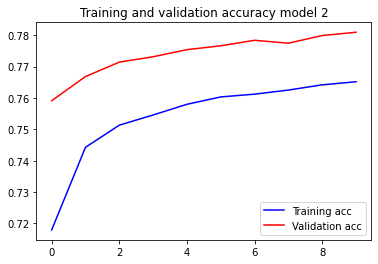

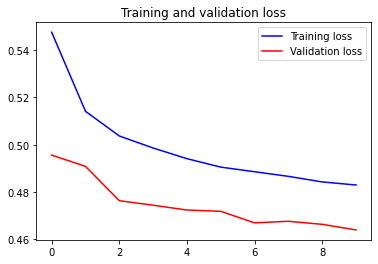

In [ ]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy model 2')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

### Result Model 2

In [ ]:
# Classification Report
%%time
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"

scores = model_2.predict(X_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 [==============================] - 8s 257ms/step
CPU times: user 8.03 s, sys: 1.75 s, total: 9.78 s
Wall time: 9.08 s


In [ ]:
from sklearn.metrics import classification_report
print("Result Model 2")
print(classification_report(list(test_data.sentiment), y_pred_1d))

Result Model 2
              precision    recall  f1-score   support

    Negative       0.78      0.77      0.78    159494
    Positive       0.78      0.79      0.78    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



# Predict

In [ ]:
SENTIMENT_THRESHOLDS = (0.4, 0.7)
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"


# def decode_sentiment(score):
#     if include_neutral:        
#         label = NEUTRAL
#         if score <= SENTIMENT_THRESHOLDS[0]:
#             label = NEGATIVE
#         elif score >= SENTIMENT_THRESHOLDS[1]:
#             label = POSITIVE

#         return label
#     else:
#         return NEGATIVE if score < 0.5 else POSITIVE
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"

In [ ]:
import time
def predict(text):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=max_length)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/model_1_tweet_sentiment.h5")

In [ ]:
predict("I love the music")

{'elapsed_time': 4.811344861984253,
 'label': 'Positive',
 'score': 0.6330840587615967}

In [ ]:
predict("You heard it here first -- We're having a girl. Hope it has my looks and Wendy's brains. (Kidding, babe).")

{'elapsed_time': 0.04516410827636719,
 'label': 'Negative',
 'score': 0.4474472999572754}